لقد رأينا كيف يمكن تحديد أكثر من مؤلف بالاعتماد على أساليبهم في الكتابة. وسنستعمل في هذا التدريب منهجية تسمى *التكشيف* لتقييم صلاحية مثل تلك المنهجيات. فإذا كان النموذج يكشف أنماطا بسيطة أو ثانوية، فستنخفض دقة النموذج سريعا خلال عملية تهذيب الخصائص المهمة. أما لو كان النموذج يكشف أنماطا جوهرية وعميقة، فستظل دقة التنبؤ عالية. واليوم سنستكشف ذلك.

لنبدأ بتجهيز بيئتنا.


In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join("..", "data")
print("Done!")

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


Done!


ستقسم بياناتنا على أجزاء تمثل فصول الكتب التي كتبها مؤلفو القرن التاسع عشر. والعملية الأساسية في التكشيف هي تدريب مصنف نصي خطي. وهذا يعني أننا نستطيع النظر في أوزان الخصائص. ثم نستبعد أهم الخصائص ونحاول مرة أخرى. وكلما كان تراجع الدقة أسرع كانت النتائج أضعف. وحيث قد يستغرق هذا التصنيف وقتا، سنرفع النتائج من نماذج قمنا بتشغيلها مسبقا.

لدينا مجموعتان تجريبيتان: البيانات الأساسية المكونة من 24 مؤلفا من مؤلفي القرن التاسع عشر، أما بيانات خط الأساس فهي من مؤلف واحد فقط هو جين أبوت  Jane Abbot. سنصنف كتبا مختلفة لنفس المؤلف، ونتوقع ألا يعمل جيدا تحليل المؤلف في هذه الحالة، لأن التحليل لنفس المؤلف. وهذا عندنا هو خط الأساس، فما مدى تسارع انخفاض الأداء؟

In [2]:
file = os.path.join(ai.data_dir, "authorship.csv")
authorship_df = pd.read_csv(file)
authorship_df.loc[:,"Type"] = "Actual"

file = os.path.join(ai.data_dir, "authorship_baseline.csv")
baseline_df = pd.read_csv(file)
baseline_df.loc[:,"Type"] = "Baseline"

print(baseline_df)
print(authorship_df)

    Cycle  Generation  N_Features  Precision  Recall  F-Score  Support  \
0       1        1850       10095       0.58    0.59     0.58       93   
1       2        1850       10048       0.48    0.48     0.46       93   
2       3        1850        9992       0.38    0.42     0.39       93   
3       4        1850        9934       0.27    0.30     0.26       93   
4       5        1850        9885       0.23    0.27     0.24       93   
5       6        1850        9842       0.22    0.26     0.23       93   
6       7        1850        9814       0.22    0.26     0.21       93   
7       8        1850        9799       0.14    0.16     0.12       93   
8       9        1850        9790       0.00    0.05     0.01       93   
9      10        1850        9788       0.00    0.05     0.01       93   
10     11        1850        9786       0.00    0.05     0.01       93   
11     12        1850        9785       0.00    0.05     0.01       93   
12     13        1850        9784     

لن نجري كل التصنيفات هنا لأنها ستستغرق وقتا إذ نحتاج لـ100 نموذج مختلف. وسنعالج إطار البيانات الخاص بالنتائج للحصول على ما نحتاجه منه.

لننشئ الآن إطار بيانات يتضمن درجة-ف الفعلية ودرجة-ف لخط الأساس.


In [3]:
results_df = pd.concat([authorship_df, baseline_df], axis=0)
print(results_df)

    Cycle  Generation  N_Features  Precision  Recall  F-Score  Support  \
0       1        1850       10095       0.99    0.99     0.99     1600   
1       2        1850       10075       0.99    0.98     0.99     1600   
2       3        1850       10053       0.98    0.98     0.98     1600   
3       4        1850       10031       0.97    0.97     0.97     1600   
4       5        1850       10011       0.97    0.97     0.97     1600   
..    ...         ...         ...        ...     ...      ...      ...   
35     16        1800        9779       0.00    0.02     0.00       93   
36     17        1800        9778       0.00    0.02     0.00       93   
37     18        1800        9777       0.00    0.02     0.00       93   
38     19        1800        9776       0.00    0.02     0.00       93   
39     20        1800        9775       0.00    0.02     0.00       93   

        Type  
0     Actual  
1     Actual  
2     Actual  
3     Actual  
4     Actual  
..       ...  
35  Ba

إذن علام يدل إطار البيانات هذا؟ لقد أجرينا نفس المهمة - أعني تصنيف المؤلفين - في 100 دورة مختلفة. وفي كل دورة نستبعد أفضل الخصائص، ولذلك نتوقع أن تنخفض دقة التنبؤ (درجة-ف) مع تقدم الوقت. إن *خط الأساس* يمثل مهمة تجهيزية نحاول فيها أن نفصل العينات عن نفس المؤلف. ولأن الكاتب واحد، نتوقع أن نرى فرقا كبيرا.

فلنلق نظرة.



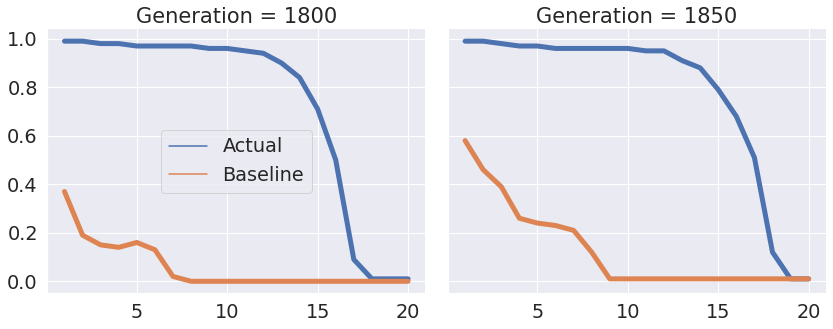

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.75)

g = sns.FacetGrid(results_df, col = "Generation", height=5, aspect = 1.2, legend_out=False)
g.map_dataframe(sns.lineplot, x="Cycle", y="F-Score", hue="Type", linewidth=5)
g.add_legend()